<a href="https://colab.research.google.com/github/JohnnyA-A/MachineLearning/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Важно!!!** Обращать внимание на комментарии в коде, там помечено, какие данные нужно поменять на свои

# Упражнение 1

Заходим https://online.ifmo.ru/pls/apex/   
Workspace: online_ru  
Username: itmo  
Password: online  

Далее SQL Workshop -> SQL Commands   
Вставляем следующую строку, **МЕНЯЯ** регионы на свои из условия   
<br>SELECT * FROM ROSSTAT_SALARY_RU WHERE REGION_NAME != 'Самарская область' AND REGION_NAME != 'Нижегородская область' AND REGION_NAME != 'Кемеровская область' AND REGION_NAME != 'Приморский край' AND REGION_NAME != 'Ненецкий АО'    
<br>Загружаем файл в коллаб, и не забываем менять **ИМЯ ФАЙЛА**

In [ ]:
import pandas as pd
#вводим имя своего файла
df = pd.read_csv("report1.csv", encoding_errors='ignore').sort_values(by=['SALARY'], ascending=True)
df.index = range(1, len(df.index) + 1)

#вместо x1 x2 x3 вводим индексы из своего условия
x1 = 24    
x2 = 38
x3 = 62
print("X" + str(x1), df.loc[x1]["SALARY"])
print("X" + str(x2), df.loc[x2]["SALARY"])
print("X" + str(x3), df.loc[x3]["SALARY"])
print("Выборочное среднее", round(df.SALARY.mean(), 2))
print("Выборочная медиана", round(df.SALARY.median(), 2))

X24 28400
X38 31647
X62 42434
Выборочное среднее 38468.55
Выборочная медиана 32089.5


#Упражнение 2

##Задание 2.1

Координата первого объекта -  -34.784
Координата второго объекта -  -22.595
Доля объясненной дисперсии при использовании первых двух главных компонент -  0.71
Минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85  -  3

Последний пункт смотрим по графику



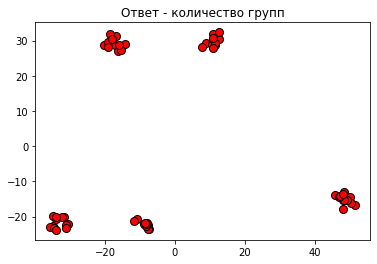

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

#сюда название своего файла или ссылку
file_name = "https://courses.openedu.ru/assets/courseware/v1/537f50b9da15bbb433272426febf974a/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/34_25.csv"
X = pd.read_csv(file_name, header = None)
pca = PCA(n_components=2, svd_solver='full')

X_transformed = pca.fit(X).transform(X)
print("Координата первого объекта - ", round(X_transformed[0][0], 3))
print("Координата второго объекта - ", round(X_transformed[0][1], 3))

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
print("Доля объясненной дисперсии при использовании первых двух главных компонент - ", explained_variance[1])
del(pca)
del(explained_variance)


min_value_ev = 0.85    # сюда вставить своё значение
pca = PCA(n_components=10, svd_solver='auto')
X_full = pca.fit(X).transform(X)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
for i in range(len(explained_variance)):
	if (explained_variance[i] >= min_value_ev):
		print("Минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала", min_value_ev, " - " , i + 1)
		break
	elif (i == len(explained_variance) - 1):
		print("Ну тут хз, сам смотри по массиву (нумерация с 1)")
		print(explained_variance)
del(X_full)
del(pca)
del(explained_variance)

print("\nПоследний пункт смотрим по графику\n")
plt.title("Ответ - количество групп")
plt.plot(X_transformed[:101, 0], X_transformed[:101, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)
plt.show()


##Задание 2.2

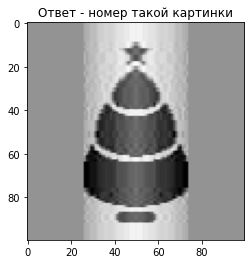

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#сюда название своего файла или ссылку
X_reduced_filename = "https://courses.openedu.ru/assets/courseware/v1/ee3345b3500b7571a589d3caa49ec743/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/X_reduced_417.csv"
#сюда название своего файла или ссылку
X_loadings_filename = "https://courses.openedu.ru/assets/courseware/v1/ad22c96aa75c298f81ec21de6f334865/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/X_loadings_417.csv"
scores = np.genfromtxt(X_reduced_filename, delimiter=';')
loadings = np.genfromtxt(X_loadings_filename, delimiter=';')
values = np.dot(scores,loadings.T)
plt.imshow(values, cmap='Greys_r')
plt.title("Ответ - номер такой картинки")
plt.show()

#Упражнение 3

##Задача 3.1

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

f = open("report31.csv", "w")
f.write(
"""id,X,Y
1,6,12
2,25,52
3,4,16
4,18,35
5,3,6
6,7,16
7,17,32
8,12,21
9,13,22
10,5,8""")  ## сюда вставить свои значения между тремя кавыччками
f.close()

df = pd.read_csv("report31.csv", index_col='id')
print("Выборочное среднее X - ", df.X.mean())
print("Выборочное среднее Y - ", df.Y.mean())


X = pd.DataFrame(df.drop(['Y'], axis=1))
Y = pd.DataFrame(df.Y)
reg = LinearRegression().fit(X,Y)
print("Коэффициент  θ_1  - ", round(reg.coef_[0][0], 2))
print("Коэффициент  θ_0  - ", round(reg.intercept_[0], 2))
print("R^2 статистика - ", round(reg.score(X,Y), 2))


Выборочное среднее X -  11.0
Выборочное среднее Y -  22.0
Коэффициент  θ_1  -  1.89
Коэффициент  θ_0  -  1.25
R^2 статистика -  0.94


##Задача 3.2

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
#сюда название своего файла или ссылку
file_name = "https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/candy-data.csv"
df = pd.read_csv(file_name, index_col='competitorname')

unnecessary_sweets = ['Hersheys Milk Chocolate', 'Payday']  #сюда вставить названия из задания
train_data = df.drop(unnecessary_sweets)

X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))
Y = pd.DataFrame(train_data['winpercent'])
reg = LinearRegression().fit(X.values, Y.values)



candy1_name = 'Hersheys Milk Chocolate'  # сюда вставить название из условия
candy1 = df.loc[candy1_name,:].to_frame().T   
print("Предсказанное значение для ", candy1_name, " - ", round(reg.predict(candy1.drop(['winpercent', 'Y'], axis=1).values)[0][0], 3))

candy2_name = 'Payday' 		# сюда вставить название из условия
candy2 = df.loc[candy2_name,:].to_frame().T 
print("Предсказанное значение для ", candy1_name, " - ", round(reg.predict(candy2.drop(['winpercent', 'Y'], axis=1).values)[0][0], 3))


candy3_pars = [1,1, 1, 0, 0, 0, 0, 0, 1, 0.801, 0.745]   #сюда вставить значения из условия
print("Предсказанное значение для конфеты с заданными параметрами - ", round(reg.predict([candy3_pars])[0][0], 3))

Предсказанное значение для  Hersheys Milk Chocolate  -  52.619
Предсказанное значение для  Hersheys Milk Chocolate  -  37.63
Предсказанное значение для конфеты с заданными параметрами -  71.077


#Упражнение 4

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

f = open("report4.csv", "w")
f.write(
"""id,X,Y,Class
1,61,48,1
2,62,28,1
3,83,84,0
4,68,24,1
5,56,39,1
6,32,95,1
7,99,14,1
8,87,64,0
9,44,35,0
10,70,51,0""")  ## сюда вставить свои значения между тремя кавыччками
f.close()

train_data = pd.read_csv("report4.csv", index_col = "id")
X = pd.DataFrame(train_data.drop(['Class'], axis=1))
Y = pd.DataFrame(train_data['Class']).values.ravel()

Euclid = KNeighborsClassifier(n_neighbors=3, p=2)
Euclid.fit(X.values, Y)

Object = [94, 37]  #сюда координаты из условия


print(round(Euclid.kneighbors([Object])[0][0][0], 3))


sec_ans = ''
for i in Euclid.kneighbors([Object])[1][0]:
	sec_ans += str(i + 1) +  ','
print(sec_ans[:-1])

print(Euclid.predict([Object])[0])


Manhattan = KNeighborsClassifier(n_neighbors=3, p=1)
Manhattan.fit(X.values, Y)
print(round(Manhattan.kneighbors([Object])[0][0][0], 3))

fif_ans = ''
for i in Manhattan.kneighbors([Object])[1][0]:
	fif_ans += str(i + 1) +  ','
print(fif_ans[:-1])

print(Manhattan.predict([Object])[0])


23.537
7,10,8
0
28.0
7,8,10
0


#Упражнение 5

In [ ]:
from math import log, exp
#сюда значения из первой таблицы в том же поряде
emails = [14, 12]
words =  [70, 46]

#сюда, соответственно, значения из второй таблицы
#не забыть поменять названия строк тоже!!!
dict = {
"Bill" : [1, 1],
"Million" : [2, 1],
"Gift" : [1, 4],
"Money" : [0, 1],
"Access" : [5, 4],
"Free" : [8, 12],
"Purchase" : [14, 22],
"Cash" : [31, 1],
"Coupon" : [7, 0],
"Online" : [1, 0],
}

#сюда строку из условия
letter = "Gift Purchase Offer Access Money Million Investment".split()
f = [0, 0]
for k in range(2):
  words_num = 10
  for i in letter:
    if i not in dict:
      words_num += 1

  com_words = words[k] + words_num
  f[k] = log(emails[k] / (emails[0] + emails[1]))
  for i in range(7):
    if letter[i] in dict:
      f[k] += log( (dict.get(letter[i])[k] + 1) / com_words)
    else:
      f[k] += log(1 / com_words)

#тут выбрать своё, а другое закомментить
p = 1 / (1 + exp(f[1] - f[0]))   #если Класс="спам"
#p = 1 / (1 + exp(f[0] - f[1]))  #если Класс="не спам"

print("Вероятность того, что письмо является спамом: ", round(emails[0] / (emails[0] + emails[1]) , 3))
print('F("спам"): ', round(f[0], 3))
print('F("не спам"): ', round(f[1], 3))
print("Вероятность P: ", round(p, 3))

Вероятность того, что письмо является спамом:  0.538
F("спам"):  -25.175
F("не спам"):  -21.456
Вероятность P:  0.024


#Упражнение 6

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#сюда название своего файла или ссылку
dataset_filename = "https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/candy-data.csv"
#сюда название своего файла или ссылку
test_filename = "https://courses.openedu.ru/assets/courseware/v1/d53b0f8b959d03cc84a992f6070cabc6/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/candy-test.csv" 
df = pd.read_csv(dataset_filename, index_col='competitorname')
  
#сюда названия исключаемых стобцов из условия 
unnecessary_sweets = ["Chewey Lemonhead Fruit Mix", "Runts", "Sixlets"]
train_data = df.drop(unnecessary_sweets)


X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))
Y = pd.DataFrame(train_data['Y'])
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, Y.values.ravel())

test_data = pd.read_csv(test_filename, delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))
Y_pred = reg.predict(X_test)
Y_pred_probs = reg.predict_proba(X_test)

Probability = pd.DataFrame({ 
    '0': [round(x[0], 3) for x in Y_pred_probs],
    '1': [round(x[1], 3) for x in Y_pred_probs]
},
index = test_data.index)


print("Первый ответ - ", Probability.loc["Tootsie Roll Juniors"][1])   #сюда название и номер класса из условия
print("Второй ответ - ", Probability.loc["Tootsie Roll Midgies"][1]) #сюда название и номер класса из условия



Y_true = (test_data['Y'].to_frame().T).values.ravel()
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)
Y_pred_probs_class_1 = Y_pred_probs[:, 1]
print("Третий ответ - ", round(metrics.recall_score(Y_true, Y_pred), 3))
print("Четвертый ответ - ", round(metrics.precision_score(Y_true, Y_pred), 3))
print("Пятый ответ - ", round(metrics.roc_auc_score(Y_true, Y_pred_probs_class_1), 3))

Первый ответ -  0.717
Второй ответ -  0.741
Третий ответ -  0.6
Четвертый ответ -  0.5
Пятый ответ -  0.86


#Рубежный зачет

Рубежное тестирование в отдельном коллабе. На прокторе нужно написать такой же код, не забывая менять данные на свои    

https://colab.research.google.com/drive/1SARZmTFi64gKf1JteCG6tz7LNn2Z3lWl?usp=sharing

#Упражнение 7

In [ ]:
#Этот код нужен, чтобы получить папки с фотографиями, сначала запустить его

import requests
#сюда вставить ссылки на архивы, первая - ссылка на гугл папку
url_1 = "https://drive.google.com/open?id=1HLJErnl0u_yiyrXykyq279DVuYMlQldW"
url_2 = "https://courses.openedu.ru/assets/courseware/v1/c8f3e99cf88c0643abc7ab918beded9c/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/test_task.zip"

url_1 = "https://drive.google.com/u/0/uc?id=" + url_1[url_1.find("id=") + 3:] + "&export=download"
f = open("train_task7.zip", "wb")
f.write(requests.get(url_1).content)
f.close()

f = open("test_task7.zip", "wb")
f.write(requests.get(url_2).content)
f.close()
from os import system
ret = system("unzip train_task7.zip -d train_task7")
ret = system("unzip test_task7.zip -d test_task7")
ret = system("rm test_task7.zip")
ret = system("rm train_task7.zip")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from imutils import paths
import numpy as np
import cv2 
import os

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

imagePaths = sorted(list(paths.list_images('train_task7/train')))
X = []
y = []

for imagePath in imagePaths:
	image = cv2.imread(imagePath, 1)
	label = imagePath.split(os.path.sep)[-1].split(".")[0]
	hist = extract_histogram(image)
	X.append(hist)
	y.append(label)

le = LabelEncoder()
y = le.fit_transform(y)
#Здесь могут быть другие test_size и random_state
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

#Здесь могут быть другие random_state и C
model = LinearSVC(random_state = 7, C = 0.58).fit(X_train, y_train)

#Во вторую скобку записать свой индекс
print(round(model.coef_[0][308], 2))
print(round(model.coef_[0][13], 2))
print(round(model.coef_[0][414], 2))


predictions = model.predict(X_test)
print(round(f1_score(y_test, predictions, average="macro"),2))

#В массив вставить названия файлов, для которых нужно сделать предсказание
test_image_names = ["dog.1041.jpg", "dog.1028.jpg", "dog.1049.jpg", "cat.1037.jpg"]
for imName in test_image_names:
	currentImage = cv2.imread("test_task7/test/" + imName)
	hist = extract_histogram(currentImage).reshape(1, -1)
	prediction = model.predict(hist)
	print(prediction[0])


0.09
-0.12
-0.01
0.6
0
0
0
0


In [ ]:
ret = system("rm -rf test_task7")
ret = system("rm -rf train_task7")

#Упражнение 8

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import graphviz

#сюда название своего файла или ссылку
file_name =  'https://courses.openedu.ru/assets/courseware/v1/f2906818eda8fcfc8f8416557ab1e6df/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/diabetes.csv'
data_pred = pd.read_csv(file_name)

# Сюда вставить своё значение
data = data_pred.head(550)
print(len(data[data.Outcome == 0]))

train = data.head(int(len(data) * 0.8))
test = data.tail(int(len(data) * 0.2))

X = train.drop(["Outcome"], axis = 1)
y = train["Outcome"]

#Сюда вставить свои значения
tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 10, min_samples_leaf = 10, random_state = 2020)
clf = tree.fit(X, y)
print(clf.tree_.max_depth)


355
4


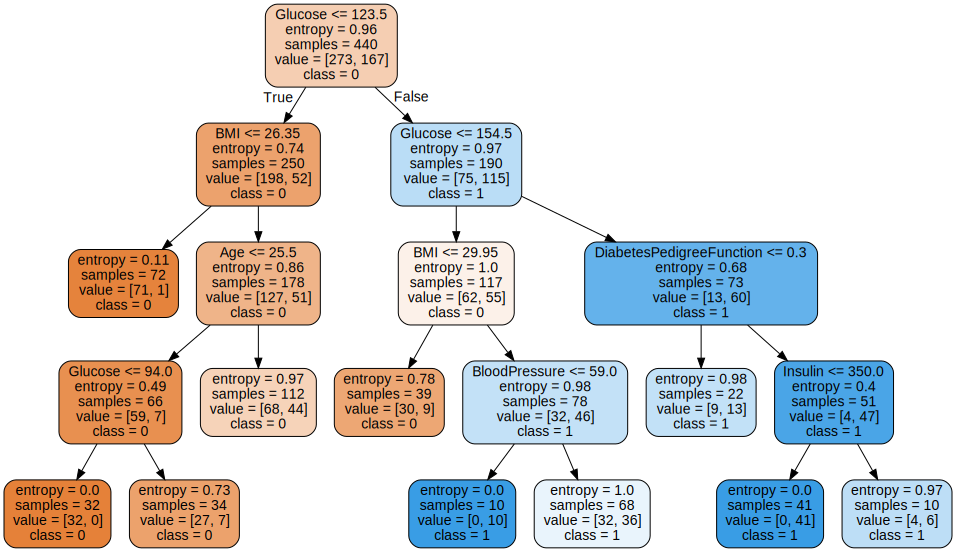

In [ ]:
columns = list(X.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#Следующие два ответа ищем по графу следующим образом:
#Ищем последнее условие по которому происходит деление
#Название этого предиктора и будет третьим ответом, а число - 94
#Для данного примера последнее условие Glucose, BloodPressure или Insulin
#Можно взять любое из них
#То есть в примере 3-й ответ(например) Glucose, а 4-й - 94.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)
print(round(accuracy_score(y_true, y_pred),2))
print(round(f1_score(y_true, y_pred, average='macro'),2))

#здесь нужно написать номера пациентов из условия
print(clf.predict([data_pred.loc[766, features].tolist()])[0])
print(clf.predict([data_pred.loc[703, features].tolist()])[0])
print(clf.predict([data_pred.loc[731, features].tolist()])[0])
print(clf.predict([data_pred.loc[716, features].tolist()])[0])

0.77
0.71
1
1
0
1


#Упражнение 9

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

f = open("report9.csv", "w")
f.write(
"""Object,X,Y,Cluster
1, 16, 12, 0
2, 5, 5, 1
3, 14, 5, 2
4, 8, 2, 1
5, 2, 18, 1
6, 1, 4, 0
7, 8, 20, 2
8, 14, 8, 1
9, 2, 17, 1
10, 7, 20, 0
11, 16, 7, 0
12, 19, 15, 0
13, 20, 20, 2
14, 20, 9, 1
15, 14, 13, 2""")  ## сюда вставить свои значения между тремя кавыччками
f.close()

data = pd.read_csv("report9.csv", delimiter=',', index_col='Object')
data = data.drop('Cluster', axis=1)

#Сюда вставить параметры из условия
kmeans = KMeans(n_clusters=3, init=np.array([[11.8, 11.6], [8.5, 9.83], [14.0, 14.5]]), max_iter=100, n_init=1)
model = kmeans.fit(data)
data["Clusters"] = model.labels_.tolist()
data


,X,Y,Clusters
Object,,,
1,16,12,2
2,5,5,1
3,14,5,0
4,8,2,0
5,2,18,1
6,1,4,1
7,8,20,2
8,14,8,0
9,2,17,1


In [ ]:
alldistances = kmeans.fit_transform(data.drop('Clusters',axis=1))
search = 0
Clusters_array = []
for i in range(len(data['Clusters'])):
  if (data['Clusters'][i+1] == search):
    Clusters_array.append(alldistances[i][search])
print(round(sum(Clusters_array)/len(Clusters_array), 3))

3.763


#Упражнение 10

In [ ]:
#Этот код нужен, чтобы получить папки с фотографиями, сначала запустить его

import requests
#сюда вставить ссылки на архивы, первая - ссылка на гугл папку
url_1 = "https://drive.google.com/open?id=1HLJErnl0u_yiyrXykyq279DVuYMlQldW"
url_2 = "https://courses.openedu.ru/assets/courseware/v1/c8f3e99cf88c0643abc7ab918beded9c/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/test_task.zip"

url_1 = "https://drive.google.com/u/0/uc?id=" + url_1[url_1.find("id=") + 3:] + "&export=download"
f = open("train_task10.zip", "wb")
f.write(requests.get(url_1).content)
f.close()

f = open("test_task10.zip", "wb")
f.write(requests.get(url_2).content)
f.close()
from os import system
ret = system("unzip train_task10.zip -d train_task10")
ret = system("unzip test_task10.zip -d test_task10")
ret = system("rm test_task10.zip")
ret = system("rm train_task10.zip")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from imutils import paths
import numpy as np
import cv2
import os

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

imagePaths = sorted(list(paths.list_images('train_task10/train')))
X = []
labels = []

for imagePath in imagePaths:
	image = cv2.imread(imagePath, 1)
	label = imagePath.split(os.path.sep)[-1].split(".")[0]
	hist = extract_histogram(image)
	X.append(hist)
	labels.append(label)
Y = [1 if x == "cat" else 0 for x in labels]

#тут вставить свои значения
svm = LinearSVC(random_state = 242, C = 1.21).fit(X, Y)
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 242), n_estimators = 19, random_state = 242).fit(X, Y)
forest = RandomForestClassifier(n_estimators = 19, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 242).fit(X, Y)


#сюда своё значение random_state
lr = LogisticRegression(solver = 'lbfgs', random_state = 242)

base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', forest)]
# здесь  изменить CV
sclf = StackingClassifier(estimators = base_estimators, final_estimator = lr, cv = 2).fit(X, Y)
print(round(sclf.score(X, Y),2))

#сюда названия картинок
test_image_names = ["cat.1025.jpg", "dog.1013.jpg", "dog.1030.jpg", "dog.1041.jpg"]
dog = 0
cat = 1
for imName in test_image_names:
	currentImage = cv2.imread("test_task10/test/" + imName)
	hist = extract_histogram(currentImage).reshape(1, -1)
	prediction = sclf.predict(hist)
	print(round(sclf.predict_proba(hist)[0][cat], 3))


0.85
0.681
0.101
0.366
0.363


In [ ]:
ret = system("rm -rf test_task10")
ret = system("rm -rf train_task10")

#Упражнение 11

Тут нет решалки, нужно считать вручную. Формула следующая:  https://drive.google.com/file/d/1VBxRkiUqr8R57RPnf6655k27OZRu43lY/view?usp=sharing   
(Стр. 36 11 главы методички)

По ней просто подставляешь и считаешь. Приведу пример со своими входными данными: https://drive.google.com/file/d/12U8T0vNGlLMhip3KQEFHKk906TlEfraG/view?usp=sharing

v = 0.4 * ( 0.3*(2 + 0.8x) + 0.7*(3 + 0.8y)) + 0.6 * (1 * (1 + 0.8y))   
x = 3 + 0.8v   
y = 0.5 * (-3 + 0.8v) + 0.5 * (0.2 * (1 + 0.8y) + 0.8 * (6 + 0.8z))   
z = 0.5 * (0.6 * (5 + 0.8v) + 0.4 * (-3 + 0.8x)) + 0.5 * (-3 + 0.8y)   

где v = V(s1), x = V(s2), y = V(s3), z = V(s4)    
Далее просто при помощи wolframalpha или photomath решаем систему уравнений

#Упражнение 12

Вводим свои epsilon, gamma и  random_seed и выставляем количетсво игр 10000    
Сначала закомментим все строчки, которые помечены как SARSA, и раскомментим строки, которые помечены как Q    
Затем, соответсвенно, делаем обратное действие, не забыв поменять число игр

In [ ]:
pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
total_episodes = 40000  #сюда количество игр
#сюда данные из начала условия
epsilon = 0.05
gamma = 0.9
random_seed = 10


time_delay = 1
lr_rate = 0.9
import gym
import numpy as np
import time


def generate_random_map(size, p, sd):
    """Generates a random valid map (one that has a path from start to goal)
    :param size: size of each side of the grid
    :param p: probability that a tile is frozen
    """
    valid = False
    np.random.seed(sd)

    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0,0))
        while frontier:
            r, c = frontier.pop()
            if not (r,c) in discovered:
                discovered.add((r,c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == 'G':
                        return True
                    if (res[r_new][c_new] not in '#H'):
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(['F', 'H'], (size, size), p=[p, 1-p])
        res[0][0] = 'S'
        res[-1][-1] = 'G'
        valid = is_valid(res)
    return ["".join(x) for x in res]


random_map = generate_random_map(size=6, p=0.8, sd = random_seed)
maze = random_map
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=False)
print("Ваша карта")
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
env.reset()
env.render()

def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0,env.action_space.n)
    else:
        action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action



def learn(state, state2, reward, action, action2, done):
    if done:
      Q[state, action] +=  lr_rate * (reward - Q[state, action])
    else:
      #Q[state, action] += lr_rate * (reward + gamma * np.max(Q[state2, :]) - Q[state, action])   #Q
      Q[state, action] += lr_rate * (reward + gamma * Q[state2, action2] - Q[state, action])      #SARSA


from tqdm import tqdm
wins_arr = []
np.random.seed(random_seed)

max_steps = 100
n_states, n_actions = env.observation_space.n, env.action_space.n
Q = np.zeros((n_states, n_actions))
min_episode = 0
for episode in tqdm(range(total_episodes)):
    state = env.reset()
    t = 0
    action = choose_action(state)    #SARSA
    while t < max_steps:
        if episode > 5 and wins_arr[episode-5] == 1 and wins_arr[episode-4] == 1 and wins_arr[episode-3] == 1 and wins_arr[episode-2] == 1 and wins_arr[episode-1] == 1 and min_episode ==0:
          min_episode = episode
        
        t += 1
        #action, action2 = choose_action(state), 0  # Q
        state2, reward, done, info = env.step(action)
        action2 = choose_action(state2)  #SARSA
        if t == max_steps:
          done = True  
        learn(state, state2, reward, action, action2, done)
        state = state2
        action = action2    #SARSA
        if done and reward == 1:
          wins_arr.append(1)
          break
        if done:
          wins_arr.append(0)
          break
print('')
print("Количество побед в серии из ", total_episodes, " игр: ", np.sum(wins_arr))
print("Пять побед подряд впервые было одержано в игре ",min_episode)


Ваша карта


100%|██████████| 40000/40000 [00:44<00:00, 903.94it/s]


Количество побед в серии из  40000  игр:  38474
Пять побед подряд впервые было одержано в игре  118


!!!Победа!!!


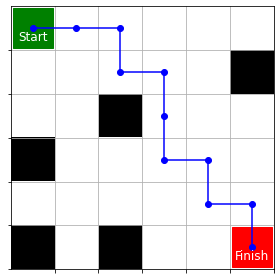

In [ ]:
#ЭТОТ БЛОК НЕ МЕНЯТЬ ВООБЩЕ
from IPython.display import clear_output
import time

def choose_action_one_game(state):
    action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action
states=[]
t = 0
state = env.reset()

while(t<1000):
  env.render()
  time.sleep(time_delay)
  clear_output(wait=True)
  action = choose_action_one_game(state)  
  state2, reward, done, info = env.step(action)  
  states.append(state)
  state = state2
  t += 1
  if done and reward == 1:
    wn=1
  if done:
    break
if wn == 1:
  print("!!!Победа!!!")
import matplotlib.pyplot as plt

def make_maze_pic(maze):
  maze_pic=[]
  for i in range(len(maze)):
    row = []
    for j in range(len(maze[i])):
      if maze[i][j] == 'S':
        row.append(0)
      if maze[i][j] == 'F':
        row.append(0)
      if maze[i][j] == 'H':
        row.append(1)
      if maze[i][j] == 'G':
        row.append(0)
    maze_pic.append(row)
  maze_pic = np.array(maze_pic)
  return maze_pic
  

#Make maze fit to plot
maze_pic = make_maze_pic(maze)
nrows, ncols = maze_pic.shape

#Arrays of picture elements
rw = np.remainder(states,nrows)
cl = np.floor_divide(states,nrows)
rw = np.append(rw, [nrows-1])
cl = np.append(cl,[ncols-1])

#Picture plotting
fig, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.clear()
ax1.set_xticks(np.arange(0.5, nrows, step=1))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0.5, ncols, step=1))
ax1.set_yticklabels([])
ax1.grid(True)
ax1.plot([0],[0], "gs", markersize=40)  # start is a big green square
ax1.text(0, 0.2,"Start", ha="center", va="center", color="white", fontsize=12) #Start text
ax1.plot([nrows-1],[ncols-1], "rs", markersize=40)  # exit is a big red square
ax1.text(nrows-1, ncols-1+0.2,"Finish", ha="center", va="center", color="white", fontsize=12) #Exit text
ax1.plot(rw,cl, ls = '-', color = 'blue') #Blue lines path
ax1.plot(rw,cl, "bo")  # Blue dots visited cells
ax1.imshow(maze_pic, cmap="binary")



#Итоговый зачет

Итоговый зачет в отдельном коллабе. На прокторе нужно написать такой же код, не забывая менять данные на свои    

https://colab.research.google.com/drive/1msiY-OKLk01J3bOpVZ5BOBDXk1TMFj3u?usp=sharing

---
#by Azatjonov Akbarjon



